In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split,cross_val_score



In [2]:
df =pd.read_csv("home_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.nunique()

id               21436
date               372
price             4032
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
df.drop(columns=["id"],inplace=True)

In [9]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

<Axes: xlabel='waterfront', ylabel='count'>

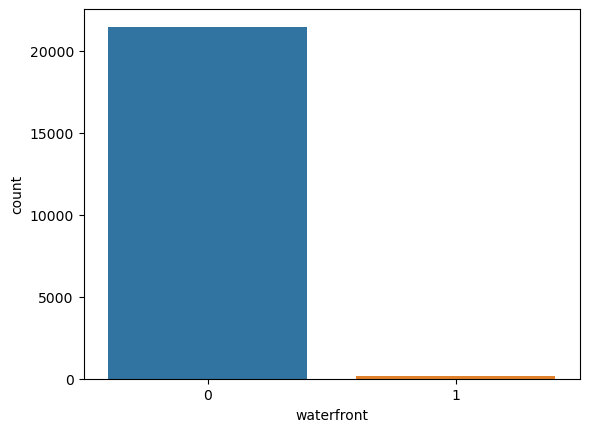

In [10]:
sns.countplot(x='waterfront',data=df)

<Axes: xlabel='view', ylabel='count'>

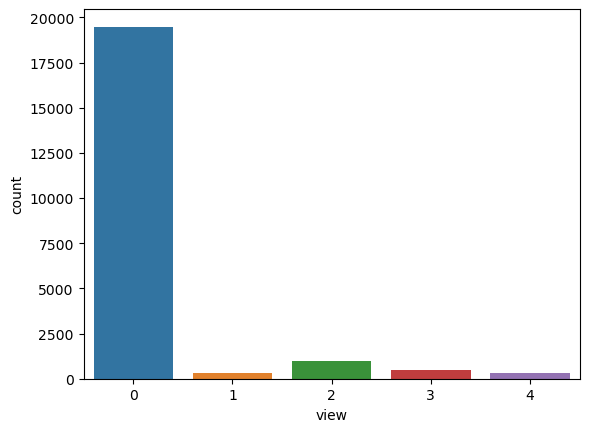

In [11]:
sns.countplot(x='view',data=df)

/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_92996/1014454525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


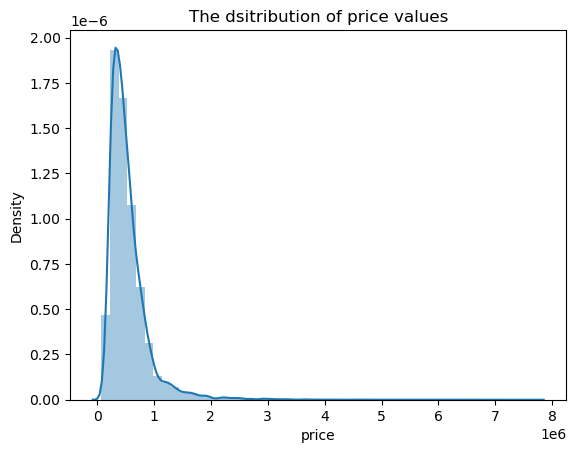

In [12]:
sns.distplot(df["price"])
plt.title("The dsitribution of price values")
plt.show()

/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_92996/1113440434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


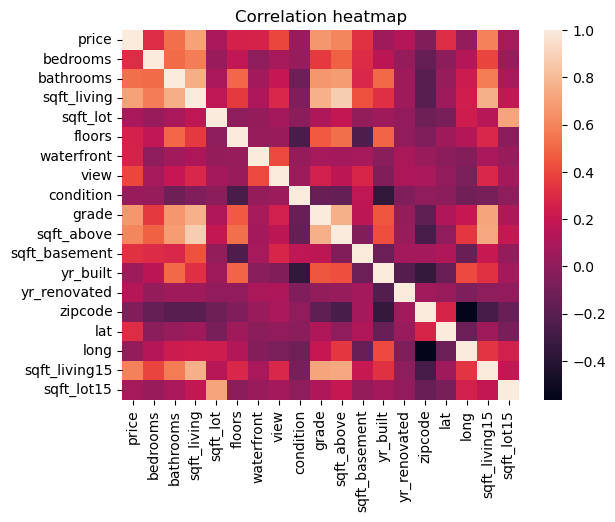

<Figure size 2000x2000 with 0 Axes>

In [13]:
corr_mat=df.corr()
sns.heatmap(corr_mat)
plt.title("Correlation heatmap")
plt.figure(figsize=(20,20))
plt.show()

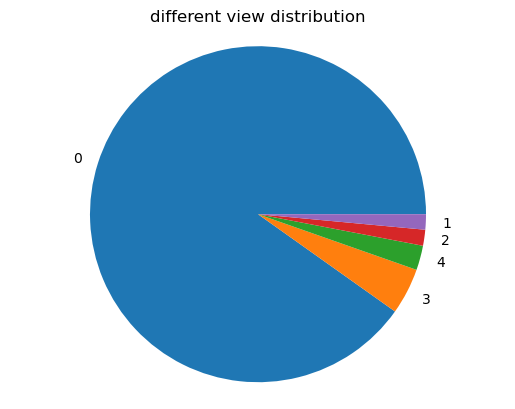

In [14]:
plt.pie(df["view"].value_counts(),labels=df["view"].unique())
plt.axis('equal')
plt.title("different view distribution")
plt.show()

Text(0.5, 1.0, 'Boxplots checking for outliers')

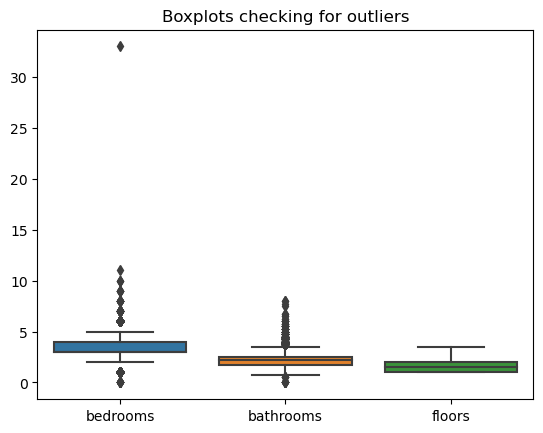

In [15]:
sns.boxplot(data=df[["bedrooms","bathrooms","floors"]])
plt.title("Boxplots checking for outliers")

In [16]:
df.duplicated().value_counts()

False    21613
dtype: int64

## Linear Regression || Lasso || Ridge

In [17]:
df1=df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms','floors','view','condition','waterfront', 'price']]
X=df1.iloc[:,:-1]
y=df1['price']


In [19]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


r2 = r2_score(y_test, y_pred)
print("R-squared (Coefficient of Determination):", r2)

Mean Squared Error (MSE): 57642183895.63588
Root Mean Squared Error (RMSE): 240087.8670312931
Mean Absolute Error (MAE): 156021.7052071121
R-squared (Coefficient of Determination): 0.6007233650831448


In [24]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [25]:
ridge = Ridge(alpha=0.1)  
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [26]:
lasso_pred=lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test,lasso_pred)
print("Mean Squared Error (MSE):", mse_lasso)
r2_lasso = r2_score(y_test, lasso_pred)
print("R-squared (Coefficient of Determination):", r2_lasso)

Mean Squared Error (MSE): 57642211837.0225
R-squared (Coefficient of Determination): 0.6007231715383818


In [27]:
ridge_pred=ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test,ridge_pred)
print("Mean Squared Error (MSE):", mse_ridge)
r2_ridge = r2_score(y_test, ridge_pred)
print("R-squared (Coefficient of Determination):", r2_ridge)

Mean Squared Error (MSE): 57643008211.66409
R-squared (Coefficient of Determination): 0.6007176552000764


## Linear Regression From Scratch

In [60]:
class LinearRegression:
    def __init__(self, lr=0.0001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n,1))
        self.grad_desc(X, y)

    def predict(self, X):
        return np.dot(X, self.theta)

    def grad_desc(self, X, y):
        m, n = X.shape
        cost = []
        for i in range(self.n_iters):
            y_preds = self.predict(X)
            error = y_preds - y
            grad = (2/m) * np.dot(X.transpose(), error)
            self.theta -= self.lr * grad
            cost.append(self.compute_cost(X, y, self.theta))
        return self.theta

    def compute_cost(self, X, y, theta):
        m = len(y)
        J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
        return J

In [61]:
df2 =pd.read_csv("food_truck_data.txt")

In [62]:
df2.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [63]:
X = df2[['Population']].values 
y = df2['Profit'].values.reshape(-1, 1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:

model= LinearRegression()
model.fit(X_train,y_train)
predicted_y=model.predict(X_test)


In [66]:
r2_s = r2_score(y_test, predicted_y)
print("R-squared :", r2_s)

R-squared : 0.5774233389459902
